In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

Vil visualisere tilnærmingsfeil til eulers metode med ulike steg. Tilnærmer funksjon fra kunnskap om derivert og initialbetingelse.

In [4]:
y = sym.symbols('y')

In [13]:
f = sym.sin(y)
f_diff = f.diff(y)

In [14]:
lam_f = sym.lambdify(y, f, 'numpy')
lam_f_diff = sym.lambdify(y, f_diff, 'numpy')

In [36]:
def euler_approx(dt, y_0=0,end=8):
    '''returns grid and yvals'''
    grid = np.arange(0, end, dt)
    y_vals = np.empty(len(grid))
    y_vals[0] = y_0
    for i in range(len(grid[1:])):
        y_vals[i+1] = y_vals[i] + lam_f_diff(grid[i])*dt
        
    return grid, y_vals

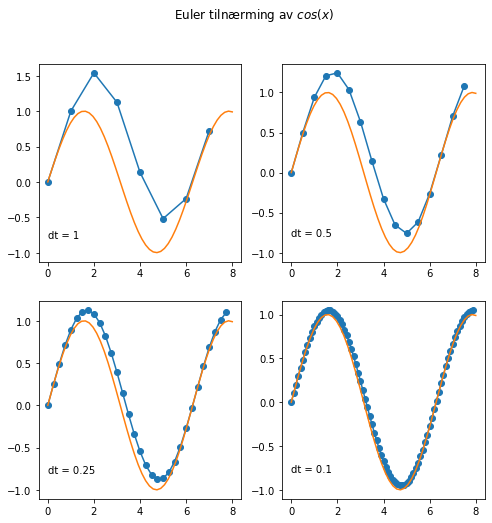

In [56]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes = axes.flatten()

steps = (1,0.5,.25,.1)
true_grid = np.linspace(0,8)
for i in range(len(axes)):
    grid, y_vals = euler_approx(dt=steps[i])
    axes[i].plot(grid, y_vals, '-o')
    axes[i].plot(true_grid, lam_f(true_grid))
    axes[i].text(x=0,y=-0.8, s=f'dt = {steps[i]}')
fig.suptitle(r'Euler tilnærming av $cos(x)$');
fig.savefig('euler.pdf')